# Molecular Demonstration

## Block-encoding (FABLE)

FABLE: Fast Approximate Quantum Circuits for Block-Encodings https://arxiv.org/abs/2205.00081

NOTE: the circuit has the reversed bits in `fable()`

For a $2^n \times 2^n$ matrix, the qubit required is $2n+1$ where the matrix is encoded in the first $n$ qubits (first $n$ after `circ.reverse_bits()` in qiskit): 

1. EXACT encoding: each entry require a $R_y + CX$ for real part, a $R_z + CX$ for imaginary part, sandwiched by $n$ number of $H$ gate, respectively. Then, $n$ number of $SWAP$ gates at the end.

2. APPROXIMATE encoding: with absolute error $\epsilon$, $||A - \alpha \tilde{A}||_2 \leq \epsilon$, it removes $R_y$ or $R_z$ gates if the calculated angles are smaller than a cutoff threshold. Then, because CX gates mutually commute, the CX gates share the same control qubits (target qubit is always the same) cancels.

Matrix Properties:
  Shape:  (8, 8)
  Norm:  7.08310606833675
  Rank:  8
  Cond:  23.94956476545792
Circuit Properties:
  Depth   :  130
  # Qubits:  7
  Gates   :  {'ry': 64, 'cx': 64, 'h': 6, 'swap': 3}
Subnormalization factor alpha:  2.5968794848252403
Absolute error:  6.179467649719818e-15
Relative error:  8.724234241448929e-16


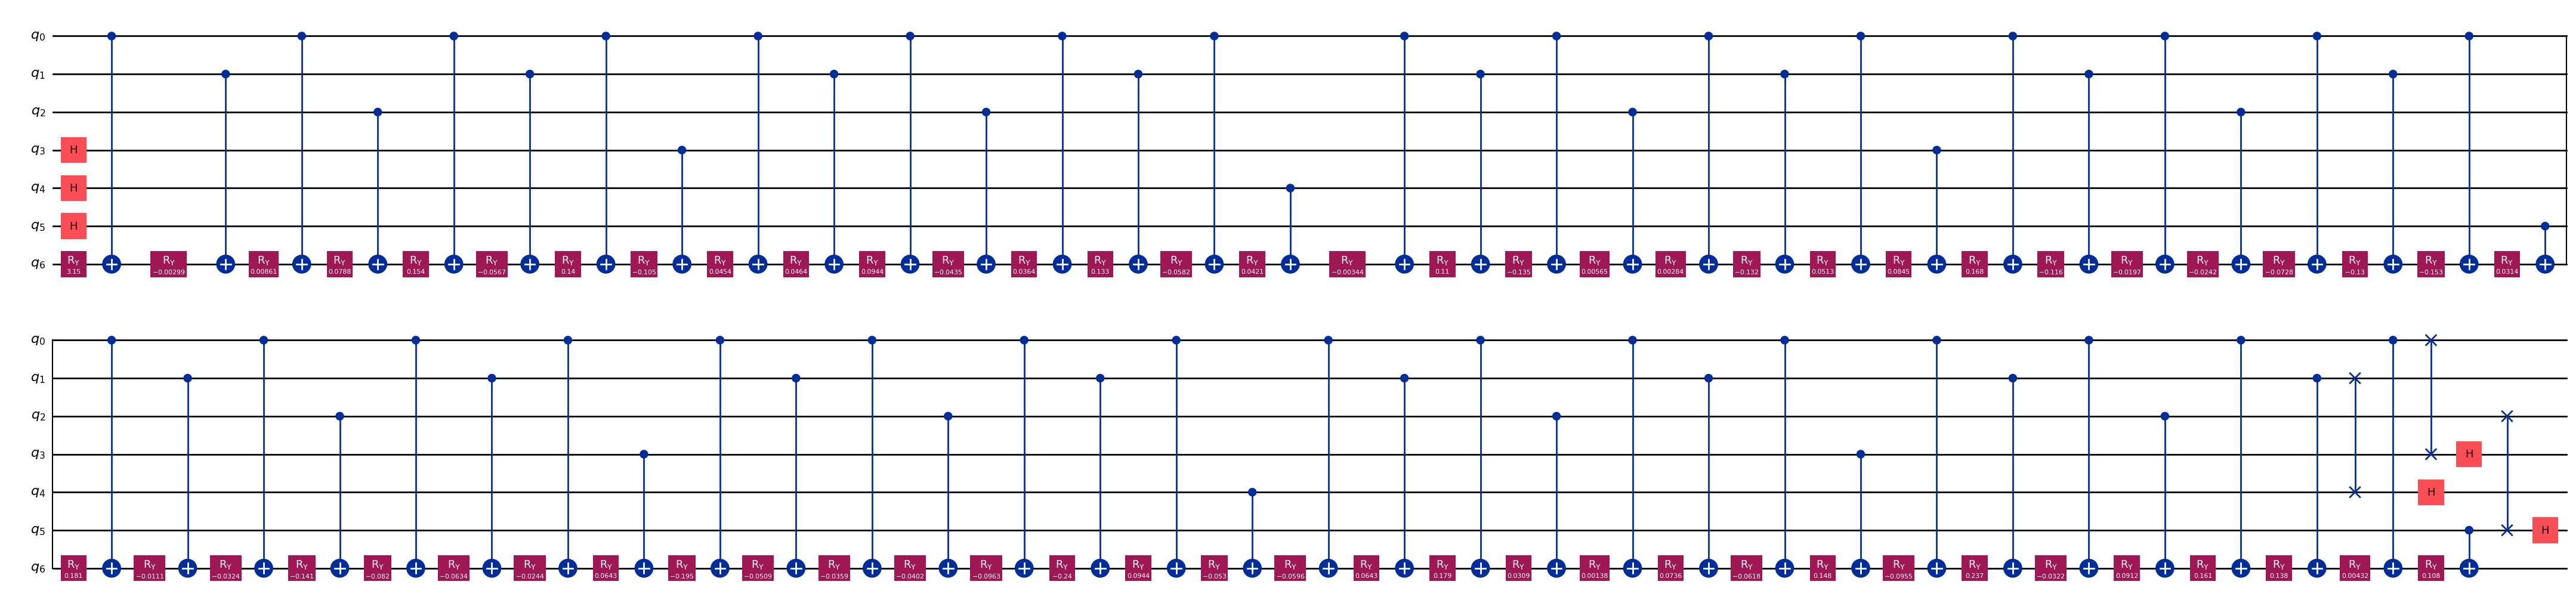

In [20]:
from _fable_block_encoding import fable
import numpy as np
from qiskit_aer import Aer
simulator = Aer.get_backend("unitary_simulator")

# generate a random matrix and block encode it
n = 3
N = 2**n
A = np.random.randn(N, N)
circ, alpha = fable(A, 0)
result = simulator.run(circ).result()
unitary = result.get_unitary(circ)
##
print("Matrix Properties:")
print("  Shape: ", A.shape)
print("  Norm: ", np.linalg.norm(A))
print("  Rank: ", np.linalg.matrix_rank(A))
print("  Cond: ", np.linalg.cond(A))
print("Circuit Properties:")
print("  Depth   : ", circ.depth())
print("  # Qubits: ", circ.num_qubits)
print("  Gates   : ", dict(circ.count_ops()))
print("Subnormalization factor alpha: ", alpha)
print("Absolute error: ", np.linalg.norm(alpha * N * unitary.data[0:N, 0:N] - A))
print("Relative error: ", np.linalg.norm(alpha * N * unitary.data[0:N, 0:N] - A)/np.linalg.norm(A))
circ.draw(output='mpl', fold=66, scale = 0.99) ## fold -> width of the image